In [1]:
import numpy as np
import pandas as pd

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Тестируем существующие библиотеки

In [163]:
H = nx.DiGraph()
axis_labels = ['p','q','r','s']
D_len_node = {}

In [164]:
#Iterate through axis labels
for i in range(0,len(axis_labels)+1):
    #Create edge from empty set
    if i == 0:
        for ax in axis_labels:
            H.add_edge('O',ax)
    else:
        #Create all non-overlapping combinations
        combinations = [c for c in itertools.combinations(axis_labels,i)]
        D_len_node[i] = combinations
    #Create edge from len(i-1) to len(i) #eg. pq >>> pqr, pq >>> pqs
    if i > 1:
        for node in D_len_node[i]:
            for p_node in D_len_node[i-1]:
                if set.intersection(set(p_node),set(node)):
                    H.add_edge(''.join(p_node),''.join(node))

In [165]:
#This is manual two options to project tesseract onto 2D plane 
# - many projections are available!!
wikipedia_projection_coords = [(0.5,0),(0.85,0.25),(0.625,0.25),(0.375,0.25),
                                (0.15,0.25),(1,0.5),(0.8,0.5),(0.6,0.5),
                                (0.4,0.5),(0.2,0.5),(0,0.5),(0.85,0.75),
                                (0.625,0.75),(0.375,0.75),(0.15,0.75),(0.5,1)]

In [166]:
#Build the "two cubes" type example projection co-ordinates
half_coords = [(0,0.15),(0,0.6),(0.3,0.15),(0.15,0),
               (0.55,0.6),(0.3,0.6),(0.15,0.4),(0.55,1)]
#make the coords symmetric
example_projection_coords = half_coords + [(1-x,1-y) for (x,y) in half_coords][::-1]

In [167]:
print(example_projection_coords)

[(0, 0.15), (0, 0.6), (0.3, 0.15), (0.15, 0), (0.55, 0.6), (0.3, 0.6), (0.15, 0.4), (0.55, 1), (0.44999999999999996, 0), (0.85, 0.6), (0.7, 0.4), (0.44999999999999996, 0.4), (0.85, 1), (0.7, 0.85), (1, 0.4), (1, 0.85)]


In [168]:
def powerset(s):
    ch = itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))
    return [''.join(t) for t in ch]

In [169]:
pos={}
for i,label in enumerate(powerset(axis_labels)):
    if label == '':
        label = 'O'
    pos[label]= wikipedia_projection_coords[i]

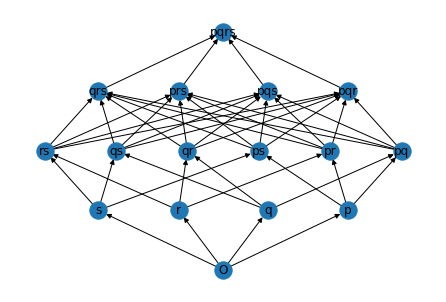

In [170]:
#Show Plot
nx.draw(H,pos,with_labels = True,node_shape = 'o')
plt.show() 

In [171]:
import math

In [172]:
def construct_projection(label):
    r1 = r2 = 0.1
    theta = math.pi / 3
    phi = math.pi / 3
    x = int( 'p' in label) + r1 * math.cos(theta) * int('r' in label) - r2 * math.cos(phi) * int('s' in label)
    y = int( 'q' in label) + r1 * math.sin(theta) * int('r' in label) + r2 * math.sin(phi) * int('s' in label)
    return (x,y)

Результаты интересные, но кажется не масштабируемы на большие решётки